# Exploration of Machine Learning Methods for Diabetes Prediction
### Comparing the results between Gaussian Naive Bayes, Logistic Regression, and Random Forest

The dataset consists of demographic and medical information from 100,000 patients. The following predictors were used to determine whether or not a patient has diabetes:
1. Gender
2. Age
3. Smoking History
4. HbA1c Level
5. Body Mass Index (BMI)
6. Blood Glucose Level
7. Hypertension
8. Heart Disease

#### The dataset was published by Mohammed Mustafa on Kaggle.
#### Link to Dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler  # To handle oversampling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load and Preprocess the Data

In [ ]:
 # Import the dataset.
data = pd.read_csv('diabetes_prediction_dataset.csv')

'''
Preprocess the data
'''
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
data['smoking_history'] = data['smoking_history'].map({
    'never':0,
    'not current':1,
    'former':2,
    'ever':3,
    'current':4,
    'No Info':5
})

# Separate features from target variable.
X = data.drop('diabetes', axis=1)

# Original vlaues of BMI and blood glucose level (before transformation)
X['bmi_original'] = X['bmi']
X['blood_glucose_level_original'] = X['blood_glucose_level']
X['HbA1c_level_original'] = X['HbA1c_level']

# Apply log transformations to the continuous features (BMI and Blood Glucose Level)
# so that they follow a uniform distribution.
X['bmi'] = np.log(X['bmi'] + 1)
X['blood_glucose_level'] = np.log(X['blood_glucose_level'] + 1)
X['HbA1c_level'] = np.log(X['HbA1c_level'] + 1)

# Target variable (0 or 1 to specify negative or positive cases of Diabetes)
y = data['diabetes']

# Split into testing and training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# ---- Random Oversampling (Hurts performance) -----

# Apply Random Oversampling to balance the classes in the training set.
# (Currently, 90% of samples are negative cases for Diabetes)
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)



#### Comparing the BMI and Blood Glucose Level columns before and after the log transformations

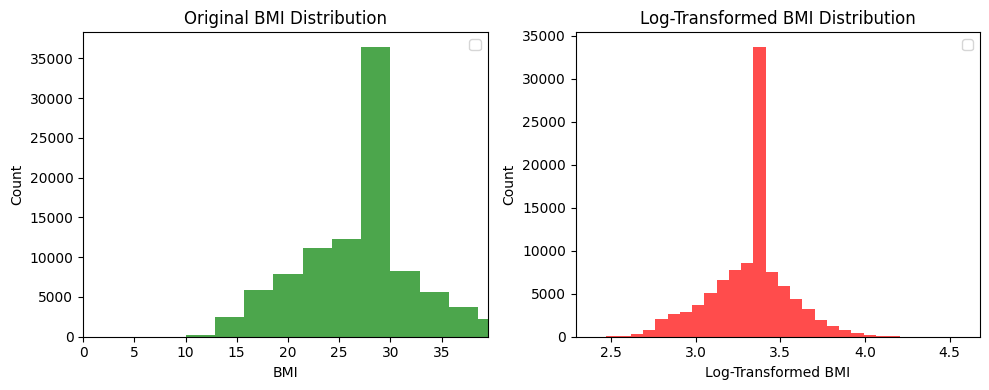

In [ ]:
# Create a 2x2 layout for the plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Top left: Original BMI
axes[0].hist(X['bmi_original'], bins=30, alpha=0.7, color='green', density=False)
axes[0].set_title('Original BMI Distribution')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Count')
axes[0].set_xlim(0, np.percentile(X['bmi_original'], 95))  # Limit x-axis for better visibility
axes[0].legend()

# Bottom left: Log-Transformed BMI
axes[1].hist(X['bmi'], bins=30, alpha=0.7, color='red', density=False)
axes[1].set_title('Log-Transformed BMI Distribution')
axes[1].set_xlabel('Log-Transformed BMI')
axes[1].set_ylabel('Count')
axes[1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


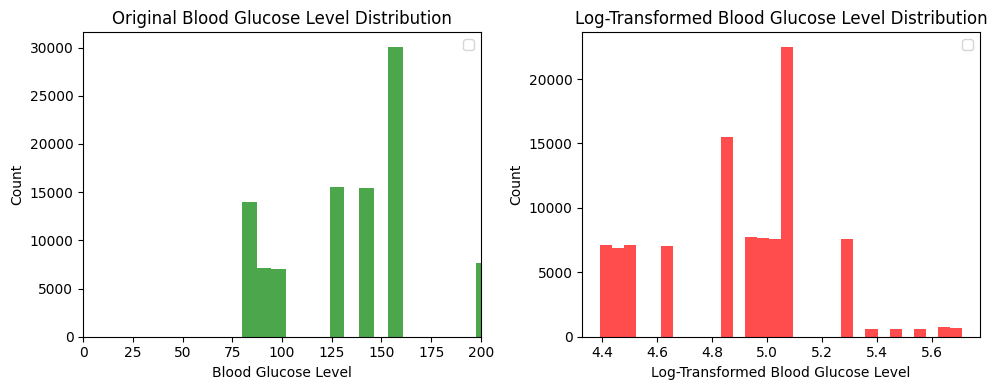

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Original Blood Glucose Level
axes[0].hist(X['blood_glucose_level_original'], bins=30, alpha=0.7, color='green', density=False)
axes[0].set_title('Original Blood Glucose Level Distribution')
axes[0].set_xlabel('Blood Glucose Level')
axes[0].set_ylabel('Count')
axes[0].set_xlim(0, np.percentile(X['blood_glucose_level_original'], 95))  # Limit x-axis
axes[0].legend()

# Log transformed Blood Glucose Level
axes[1].hist(X['blood_glucose_level'], bins=30, alpha=0.7, color='red', density=False)
axes[1].set_title('Log-Transformed Blood Glucose Level Distribution')
axes[1].set_xlabel('Log-Transformed Blood Glucose Level')
axes[1].set_ylabel('Count')
axes[1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

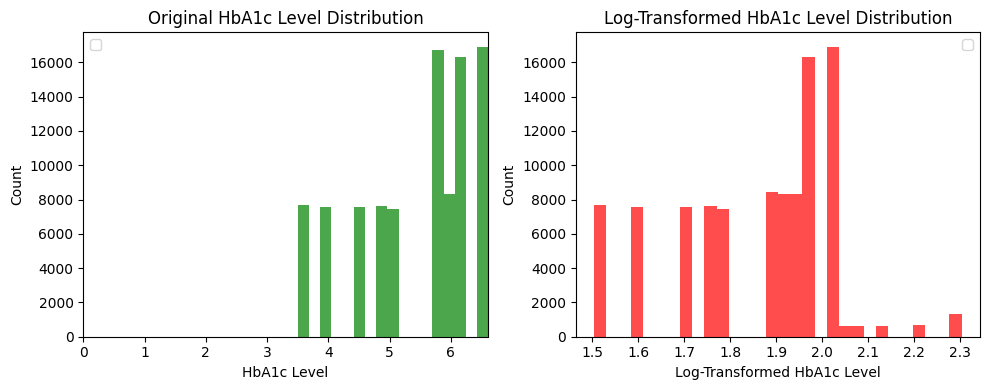

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Original HbA1c Level
axes[0].hist(X['HbA1c_level_original'], bins=30, alpha=0.7, color='green', density=False)
axes[0].set_title('Original HbA1c Level Distribution')
axes[0].set_xlabel('HbA1c Level')
axes[0].set_ylabel('Count')
axes[0].set_xlim(0, np.percentile(X['HbA1c_level_original'], 95))  # Limit x-axis
axes[0].legend()

# Bottom right: Log-Transformed HbA1c Level
axes[1].hist(X['HbA1c_level'], bins=30, alpha=0.7, color='red', density=False)
axes[1].set_title('Log-Transformed HbA1c Level Distribution')
axes[1].set_xlabel('Log-Transformed HbA1c Level')
axes[1].set_ylabel('Count')
axes[1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Overall Data

Class Distribution

<ipython-input-6-0f5698bfe1c3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, legend=False, palette=custom_colors)


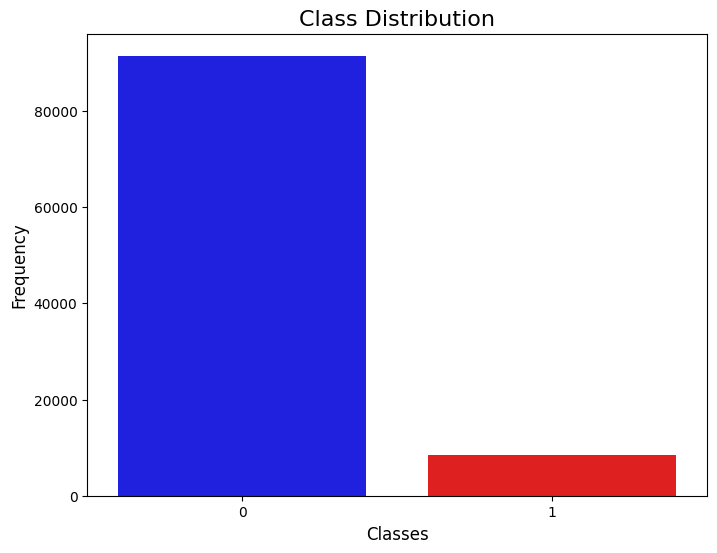

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = y.value_counts()

# Define custom colors
custom_colors = ['blue', 'red']

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, legend=False, palette=custom_colors)
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


Correlation Matrix

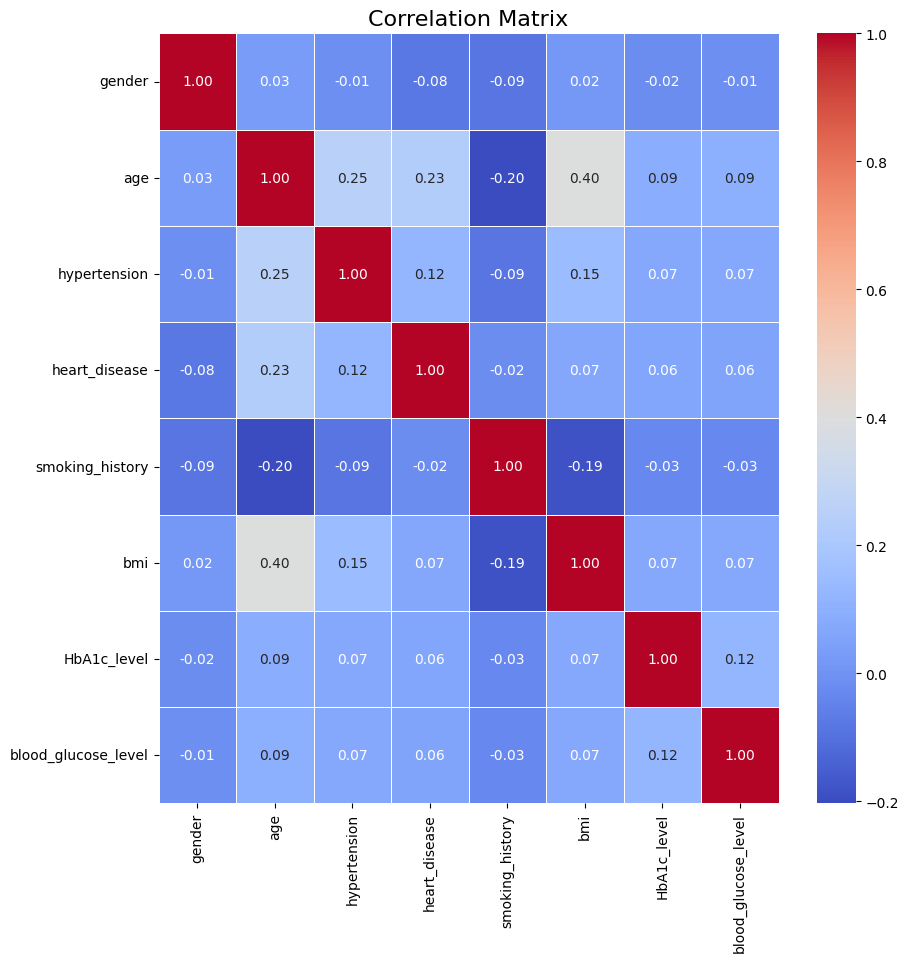

In [ ]:
# Compute the correlation matrix
X_temp = X.drop(['bmi_original', 'blood_glucose_level_original', 'HbA1c_level_original'], axis=1)
correlation_matrix = X_temp.corr()

# Plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


# Implementing various machine learning models

(Updated them with the resampled X and Y, and it hurt performance. Change back to default instead)

### Naive Bayes

In [ ]:
gnb = GaussianNB()

# Train and predict with Gaussian Naive Bayes
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# Print classification reports for each model
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, gnb_predictions))

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     18300
           1       0.52      0.74      0.61      1700

    accuracy                           0.92     20000
   macro avg       0.75      0.84      0.78     20000
weighted avg       0.94      0.92      0.93     20000



### Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train and predict with Logistic Regression
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.87      0.64      0.74      1700

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


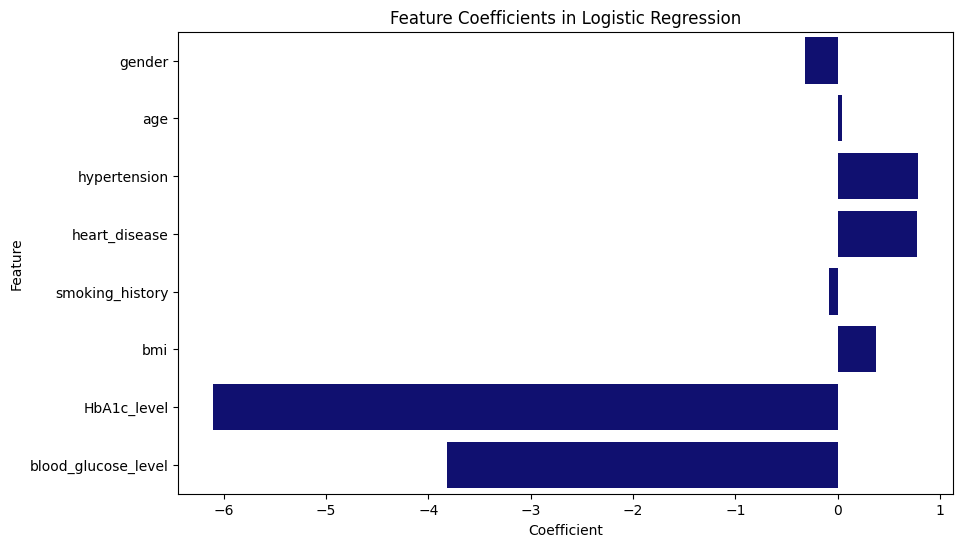

In [ ]:
# Extract coefficients

# Extract coefficients
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]  # Access coefficients from the model
})

# Assuming excluded_features is defined (e.g., excluded_features = ['age'])
excluded_features = ['bmi_original', 'blood_glucose_level_original', 'HbA1c_level_original']  # Or your actual list of features to exclude

# Filter coefficients to exclude specific features
filtered_coeffs = coeffs[~coeffs['Feature'].isin(excluded_features)]

# Plot filtered coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=filtered_coeffs, color='navy')
plt.title('Feature Coefficients in Logistic Regression')
plt.show()


### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and predict with Random Forest Classifier
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report: ")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



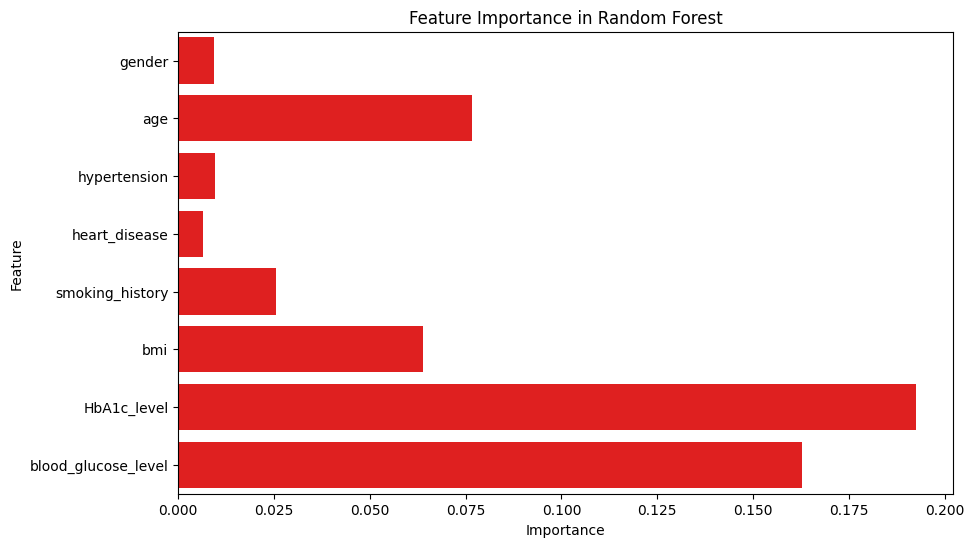

In [ ]:
# Get feature importance
import pandas as pd

# Get feature importances from the trained model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_  # Access feature importances
})

# Filter feature importance to exclude specific features
excluded_features = ['HbA1c_level_original', 'blood_glucose_level_original', 'bmi_original']
filtered_feature_importances = feature_importances[~feature_importances['Feature'].isin(excluded_features)]

# Plot filtered feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=filtered_feature_importances, color='red')
plt.title('Feature Importance in Random Forest')
plt.show()

# Evaluating Performance Across Each Model

### Precision Recall Curve

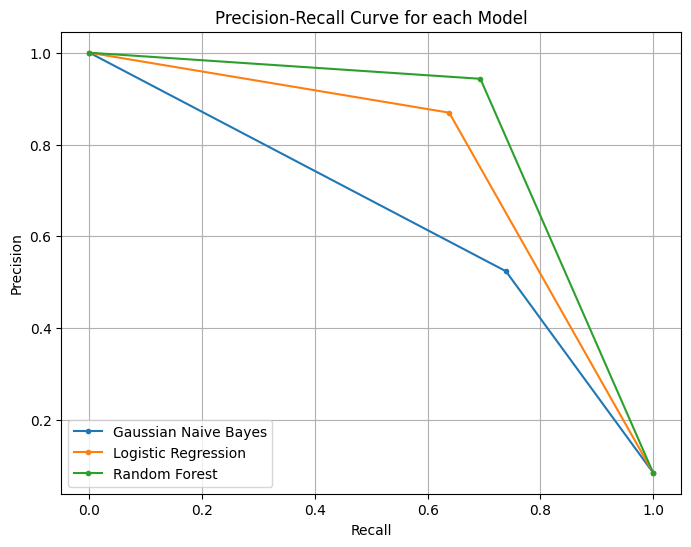

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

gnb_precision, gnb_recall, _ = precision_recall_curve(y_test, gnb_predictions)
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_predictions)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))

plt.plot(gnb_recall, gnb_precision, marker='.', label='Gaussian Naive Bayes')
plt.plot(logreg_recall, logreg_precision, marker='.', label='Logistic Regression')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each Model')
plt.legend()
plt.grid()
plt.show()

### ROC Curve with AUC

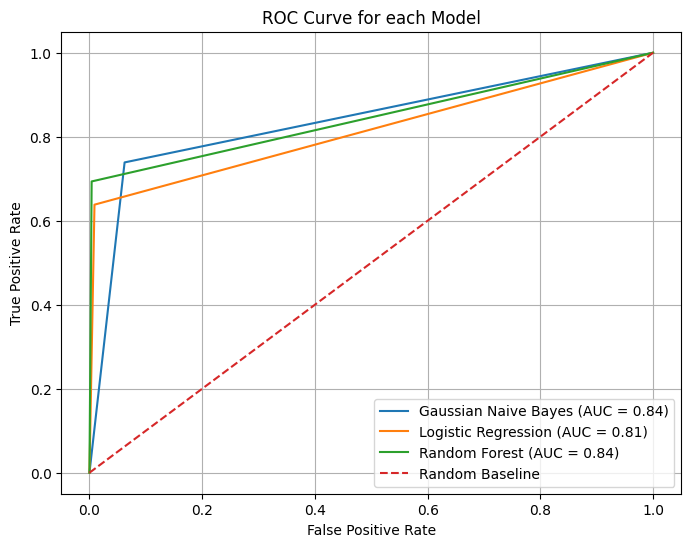

In [ ]:
gnb_fp, gnb_tp, _ = roc_curve(y_test, gnb_predictions)
logreg_fp, logreg_tp, _ = roc_curve(y_test, logreg_predictions)
rf_fp, rf_tp, _ = roc_curve(y_test, y_pred_rf)

gnb_roc_auc = auc(gnb_fp, gnb_tp)
logreg_roc_auc = auc(logreg_fp, logreg_tp)
svm_roc_auc = auc(rf_fp, rf_tp)

plt.figure(figsize=(8, 6))
plt.plot(gnb_fp, gnb_tp, label=f'Gaussian Naive Bayes (AUC = {gnb_roc_auc:.2f})')
plt.plot(logreg_fp, logreg_tp, label=f'Logistic Regression (AUC = {logreg_roc_auc:.2f})')
plt.plot(rf_fp, rf_tp, label=f'Random Forest (AUC = {svm_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], label='Random Baseline', linestyle='dashed')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()